In [ ]:
# load relevant libraries
import numpy as np
import pandas as pd

https://www.kaggle.com/code/artemborzenko/analyze-the-esrb-rating-of-games-dataset

Resource that deals with the same data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:


# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 


# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

Need to load the file manually from the computer each time

By uploading to session storage

In [ ]:
#df = pd.read_csv("/Video_games_esrb_rating.csv")
# AK: I added a slash, perhaps that's a windows requirement, upload the data ouside of the folders  


df = pd.read_csv("Video_games_esrb_rating.csv")

In [ ]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

E     315
T      43
ET     17
M       4
Name: esrb_rating, dtype: int64

In [ ]:
test_df = df[df["no_descriptors"] == 1]

In [ ]:
test_df[test_df["esrb_rating"] == "M"]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
260,Maneater,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,M
626,Observation,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
682,Tharsis,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
1387,Frostpunk,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M


Data is incorrectly labeled

Removing titles with no descriptors because there is no way to classify them.

Might also want to remove titles with less than a certain number of descriptors.

Should probably add a feature which is number of descriptors.

In [ ]:
df["no_descriptors"].value_counts()

0    2016
1     379
Name: no_descriptors, dtype: int64

In [ ]:
# df = df[df["no_descriptors"] == 0]

In [ ]:
df["no_descriptors"].value_counts()

0    2016
1     379
Name: no_descriptors, dtype: int64

Manually combined the 2 csv files on my own computer. Adds some more data.

The data is already beoken up into 2 csvs 

One for training and the other for testing

Kind of annoying but I could append one to the other and split them myself

In [ ]:
df.shape

(2395, 34)

In [ ]:
df.describe(include="all")

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,2395,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000,2395
unique,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Night Trap - 25th Anniversary Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873
mean,NaN,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,...,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823,NaN
std,NaN,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,...,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN


Because almost all of the data is of boolean type describing doesn't do anything

Feature_name :	type	description	Keys 

<br>

title	string	Name of the game.	----

<br>


"conslole"	int	The console on which the game was released.	0 = PS4
1 = PS4 & Xbox_one

<br>

Alcohol_Reference	int	Reference to and/or images of alcoholic beverages.	0 = no
1 = yes
Animated_Blood	int	Discolored and/or unrealistic depictions of blood.	0 = no
1 = yes
Blood	int	Depictions of blood.	0 = no
1 = yes
BloodandGore	int	Depictions of blood or the mutilation of body parts.	0 = no
1 = yes
Cartoon_Violence	int	Violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted.	0 = no
1 = yes
Crude_Humor	int	Depictions or dialogue involving vulgar antics, including "bathroom" humor.	0 = no
1 = yes
DrugRe_ference	int	Reference to and/or images of illegal drugs.	0 = no
1 = yes
Fantasy_Violence	int	Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.	0 = no
1 = yes
Intense_Violence	int	Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death.	0 = no
1 = yes
Language	int	Moderate use of profanity.	0 = no
1 = yes
Lyrics	int	References to profanity, sexuality, violence, alcohol, or drug use in music.	0 = no
1 = yes
Mature_Humor	int	Depictions or dialogue involving "adult" humor, including sexual references.	0 = no
1 = yes
Mild_Blood	int	Some blood.	0 = no
1 = yes
MildCartoonViolence	int	Some violent actions involving cartoon.	0 = no
1 = yes
MildFantasyViolence	int	Some violent actions of a fantasy nature.	0 = no
1 = yes
Mild_Language	int	Mild to moderate use of profanity.	0 = no
1 = yes
Mild_Lyrics	int	Mild References to profanity, sexuality, violence, alcohol, or drug use in music.	0 = no
1 = yes
MildSuggestiveThemes	int	some provocative references or materials	0 = no
1 = yes
Mild_Violence	int	Some scenes involving aggressive conflict.	0 = no
1 = yes
No_Descriptors	int	No content descriptors.	0 = no
1 = yes
Nudity	int	Graphic or prolonged depictions of nudity.	0 = no
1 = yes
Partial_Nudity	int	Brief and/or mild depictions of nudity.	0 = no
1 = yes
Sexual_Content	int	Non-explicit depictions of sexual behavior, possibly including partial nudity.	0 = no
1 = yes
Sexual_Themes	int	References to sex or sexuality.	0 = no
1 = yes
Simulated_Gambling	int	Player can gamble without betting or wagering real cash or currency.	0 = no
1 = yes
Strong_Language	int	Explicit and/or frequent use of profanity.	0 = no
1 = yes
StrongSexualContent	int	Explicit and/or frequent depictions of sexual behavior, possibly including nudity.	0 = no
1 = yes
Suggestive_Themes	int	Provocative references or materials.	0 = no
1 = yes
UseofAlcohol	int	The consumption of alcoholic beverages.	0 = no
1 = yes
UseofDrugsandAlcohol	int	The consumption of alcoholic and drugs beverages.	0 = no
1 = yes
Violence	int	Scenes involving aggressive conflict. May contain bloodless dismemberment.	0 = no
1 = yes
ESRB_rating	string	rating: RP - EC - E - E+10 - T - M - A	RP , EC , E , ET , T , M , A

Data dictionary does not copy paste well

Maybe find a different way to display it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

All columns should be boolean except for Title which should be string

And esrb_rating which should be categorical

In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

The column names follow proper conventions

strong_language is misspelled as

strong_janguage

Should probably rename the column

In [ ]:
df["strong_language"] = df["strong_janguage"]

In [ ]:
df.drop("strong_janguage", axis=1, inplace=True)

Console should not be useful so I am dropping it

In [ ]:
df.drop("console", axis=1, inplace=True)

Going to try an easy way to change the colum  types

In [ ]:
column_names = list(df.columns)

In [ ]:
column_names

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'strong_language']

In [ ]:
#for name in column_names:
#  if (name == "title"):
#    df["title"] = df.title.astype(str)

#  elif (name == "esrb_rating"):
#    df["esrb_rating"] = df.esrb_rating.astype("category")

#  else:
#    df[name] = df[name].astype(bool)



# do not need to do this


In [ ]:
#df["num_descriptors"] = df['alcohol_reference'] + df['animated_blood'] + df['blood'] + df['blood_and_gore'] + df['cartoon_violence'] + df['crude_humor'] + df['drug_reference'] + df['fantasy_violence'] + df['intense_violence'] + df['language'] + df['lyrics'] + df['mature_humor'] + df['mild_blood'] + df['mild_cartoon_violence'] + df['mild_fantasy_violence'] + df['mild_language'] + df['mild_lyrics'] + df['mild_suggestive_themes'] + df['mild_violence'] + df['nudity'] + df['partial_nudity'] + df['sexual_content'] + df['sexual_themes'] + df['simulated_gambling'] + df['strong_janguage'] + df['strong_sexual_content'] + df['suggestive_themes'] +df['use_of_alcohol'] + df['use_of_drugs_and_alcohol'] + df['violence']

# maybe there is a better way to do this

# better way is below

In [ ]:
list_descriptors = list(df.columns)





In [ ]:
list_descriptors.remove("title")
list_descriptors.remove("esrb_rating")
#list_descriptors.remove("num_descriptors")

In [ ]:
df["num_descriptors"] = df[list_descriptors].sum(axis=1)

In [ ]:
df.head(10)

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,1
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,ET,0,3
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,1,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,ET,0,3
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,T,0,3
5,Monster Energy Supercross - The Official Video...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,1
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,T,0,3
7,Blightbound,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,2
8,Maquette,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,0,2
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,T,0,1


In [ ]:
df['num_descriptors'].value_counts()

1    1003
2     589
3     417
4     241
5     108
0      19
6      18
Name: num_descriptors, dtype: int64

There seems to be a problem here

We have 19 games that have 0 descriptors but all of those should have been removed

In [ ]:
df[df['num_descriptors'] == 0]

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
208,Race with Ryan Road Trip Deluxe Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
322,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
408,Garfield Kart: Furious Racing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
430,Race with Ryan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
536,Harvest Moon: Mad Dash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
543,The Angry Birds Movie 2 VR: Under Pressure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
639,Everybody's Golf VR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,0,0
927,The Golf Club 2019 Featuring the PGA Tour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
1265,Old Man's Journey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0


After looking ino the data these ones have no descriptors but for some reason are improperly labeled in the no_descriptors column as hvaing descriptors

Maybe this is because our data is inomplete and there are more descriptors used in the actual review of games

For now I shall remove these games

In [ ]:
# df = df[df["num_descriptors"] != 0]

In [ ]:
df['num_descriptors'].value_counts()

1    1003
2     589
3     417
4     241
5     108
0      19
6      18
Name: num_descriptors, dtype: int64

In [ ]:
df.dtypes

title                       object
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_sexual_content        int64
suggestive_themes            int64
use_of_alcohol      

In [ ]:
df.isnull().sum()

title                       0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_rating                 0
strong_language             0
num_descri

No missing data

In [ ]:
df.esrb_rating.value_counts()

T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64

There seem to be less rating categories than those specifid in the data dictionary

Data is mostly balanced

In [ ]:
df.esrb_rating.unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

In [ ]:
df.title.value_counts().value_counts()

1    2269
2      63
Name: title, dtype: int64

After adding the test data to the regular data we can see that there are some games with the same name

This may also be a case of special characters not being stored properly

In [ ]:
df.duplicated().sum()

33

We can also now see that there are 18 duplicated records

These should be removed

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Night Trap - 25th Anniversary Edition    2
Momodora: Reverie Under the Moonlight    2
BLACKHOLE: Complete Edition              2
RAID: WORLD WAR II                       2
Wonder Boy: The Dragon's Trap            2
                                        ..
Legendary Eleven                         1
Devil May Cry 5                          1
Dust: An Elysian Tail                    1
Forgotton Anne                           1
Crypt of the Serpent King                1
Name: title, Length: 2332, dtype: int64
***********************
alcohol_reference
0    2274
1     121
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2375
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1841
1     554
Name: blood, dtype: int64
***********************
blood_and_gore
0    2090
1     305
Name: blood_and_gore, dtype: int64
***********************
cartoon_violence
0    2347
1      48
Name: cartoon_violence, dtype: int64
*******************

This shows us the names of some of the games that are here multiple times

In [ ]:
# Ask students to solve this one...
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(2395, 34) before dropping dupes
(2362, 34) after dropping dupes


In [ ]:
df.title.value_counts().value_counts()

1    2302
2      30
Name: title, dtype: int64

We can see removing the duplicates got rid of some of the games with the same name but not all

In [ ]:
df.duplicated().sum()

0

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Night Trap - 25th Anniversary Edition          2
Jak II                                         2
Serial Cleaner                                 2
BUTCHER                                        2
What Remains of Edith Finch                    2
                                              ..
The Legend of Heroes: Trails of Cold Steel     1
Lichtspeer                                     1
Mantis Burn Racing                             1
Legendary Eleven                               1
Crypt of the Serpent King                      1
Name: title, Length: 2332, dtype: int64
***********************
alcohol_reference
0    2243
1     119
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2342
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1812
1     550
Name: blood, dtype: int64
***********************
blood_and_gore
0    2058
1     304
Name: blood_and_gore, dtype: int64
***********************
cartoon_violence
0    2314


After looking into the data it seems that the reason some games are in the data twice is because of remasters and sometimes the remasters have different descriptors or ratings

It would have been good for the data to have renamed the name of these games to remastered so we would not have this issue

Otherwise this shows us how perception of the content of a game can change with time or depending on how was tasked with reveiwing it

Not sure what I should do with these but I will leave them in for now

In [ ]:
#sns.pairplot(df);

# got an error

In [ ]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

In [ ]:
df["esrb_encoded"] = df["esrb_rating"].map(encode)

There is a specific word for data that is categorical but has a hierarchy to it

In [ ]:
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,0,1,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,ET,0,3,1
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,M,1,3,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ET,0,3,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,T,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2362 non-null   object
 1   alcohol_reference         2362 non-null   int64 
 2   animated_blood            2362 non-null   int64 
 3   blood                     2362 non-null   int64 
 4   blood_and_gore            2362 non-null   int64 
 5   cartoon_violence          2362 non-null   int64 
 6   crude_humor               2362 non-null   int64 
 7   drug_reference            2362 non-null   int64 
 8   fantasy_violence          2362 non-null   int64 
 9   intense_violence          2362 non-null   int64 
 10  language                  2362 non-null   int64 
 11  lyrics                    2362 non-null   int64 
 12  mature_humor              2362 non-null   int64 
 13  mild_blood                2362 non-null   int64 
 14  mild_cartoon_violence   

In [ ]:
#df["esrb_encoded"] = df.esrb_rating.astype(float)

df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

# the second method worked but not the first

Needed to change the encoded type to a number so we can get correlations

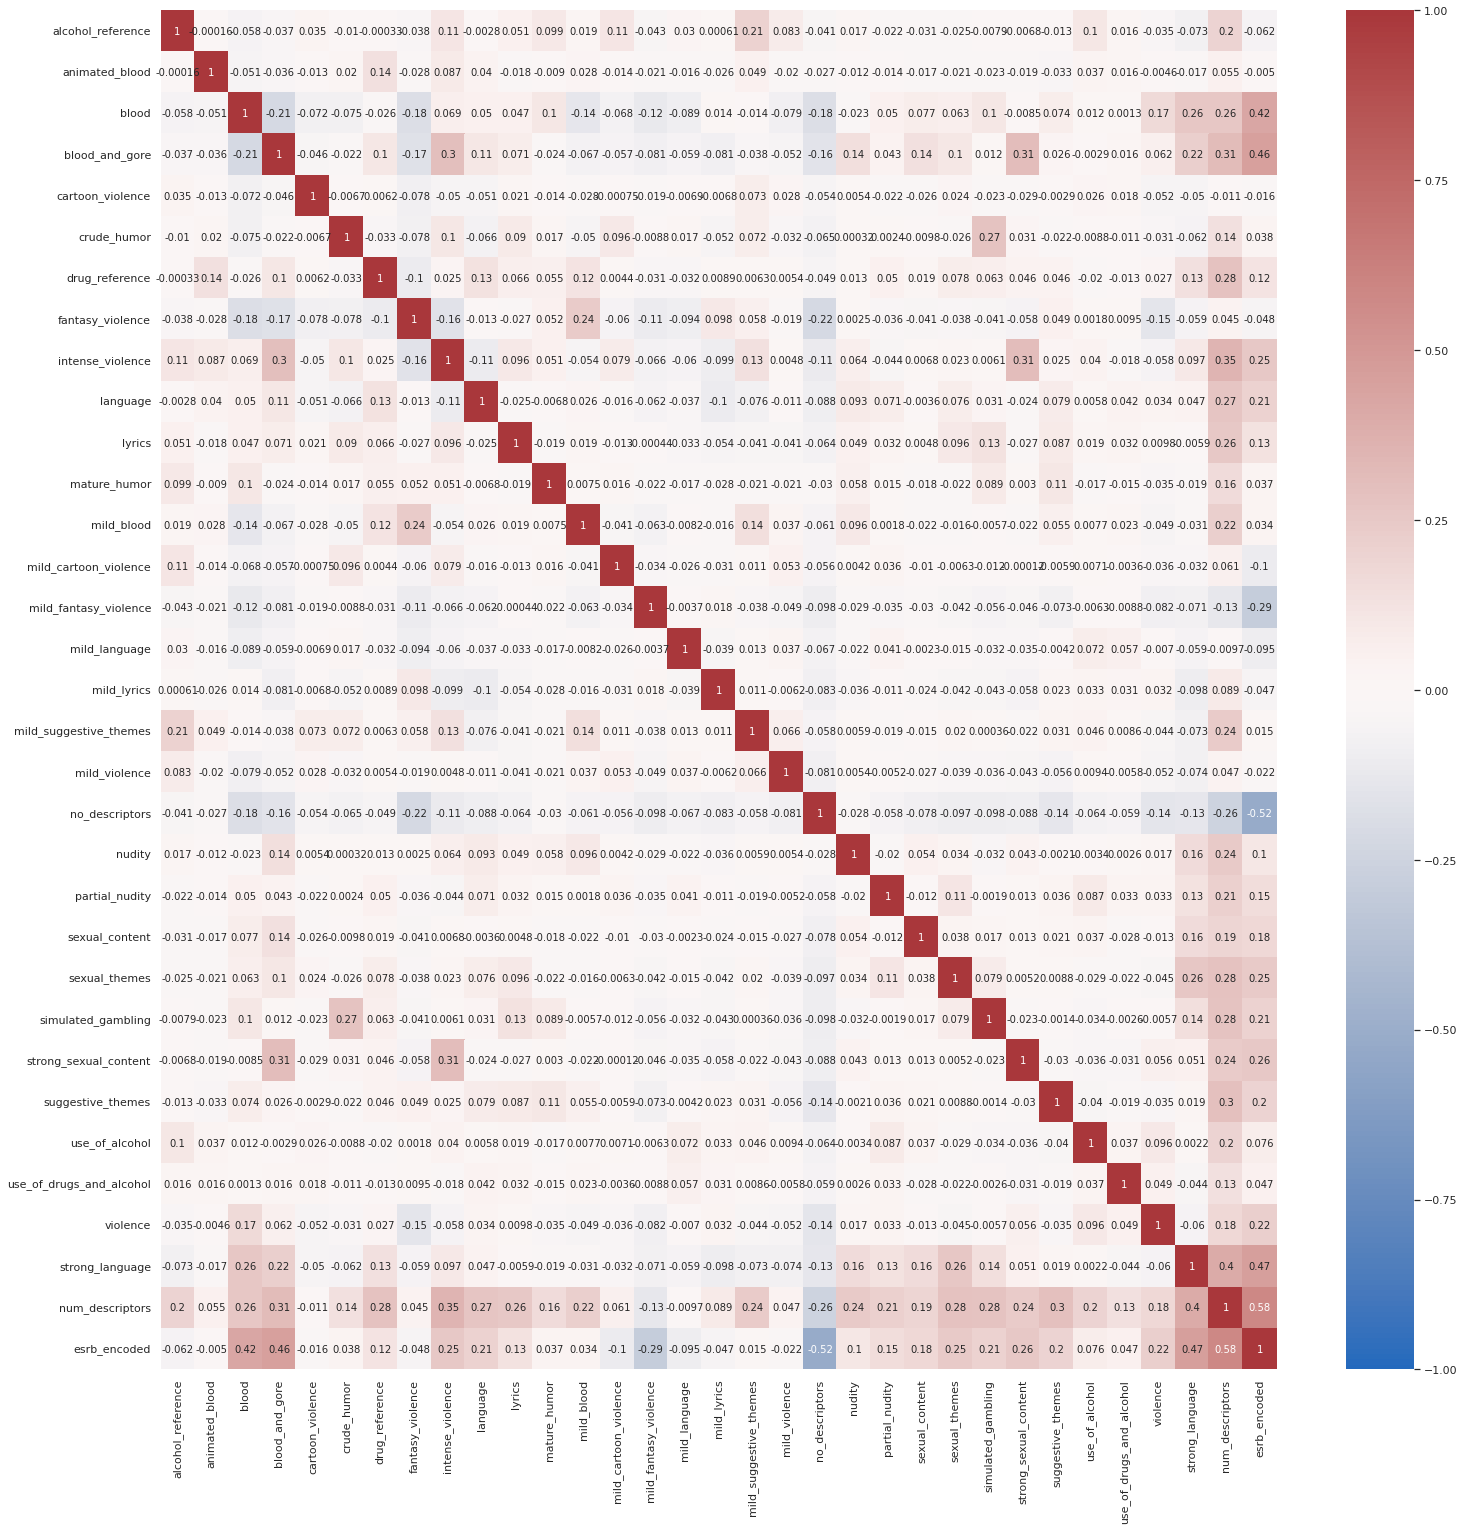

In [ ]:


plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

Might want to remove no_descriptors from the column names

In [ ]:
selected_features = list(df.columns)

In [ ]:
selected_features

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'strong_language',
 'num_descriptors',
 'esrb_encoded']

In [ ]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_encoded")
selected_features.remove("no_descriptors")



# cosole can also probably be removed

In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Going to split the current dataset for now instead of using the test data

In [ ]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1889 
Length of our Testing data: 473


First will try a normal decision tree and then a random forest

These seem like the best classifiers to use

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

#precision = precision_score(y_true=y_test, y_pred=y_pred)
#print("Precision Score: %f" % precision)

#recall = recall_score(y_true=y_test, y_pred=y_pred)
#print("Recall Score: %f" % recall)

#f1 = f1_score(y_true=y_test, y_pred=y_pred)
#print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
#auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
#print('AUC Score: %f' % auc)

Accuracy Score: 0.852008


Need different metrics for a multiclass classifier

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.77      0.76      0.76       104
           M       0.87      0.89      0.88        76
           T       0.83      0.82      0.82       180

    accuracy                           0.85       473
   macro avg       0.86      0.86      0.86       473
weighted avg       0.85      0.85      0.85       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[108   2   0   3]
 [  4  79   0  21]
 [  0   1  68   7]
 [  1  21  10 148]]


Would be nice if it was labeled

Not exactly sure what the order of the class names should be

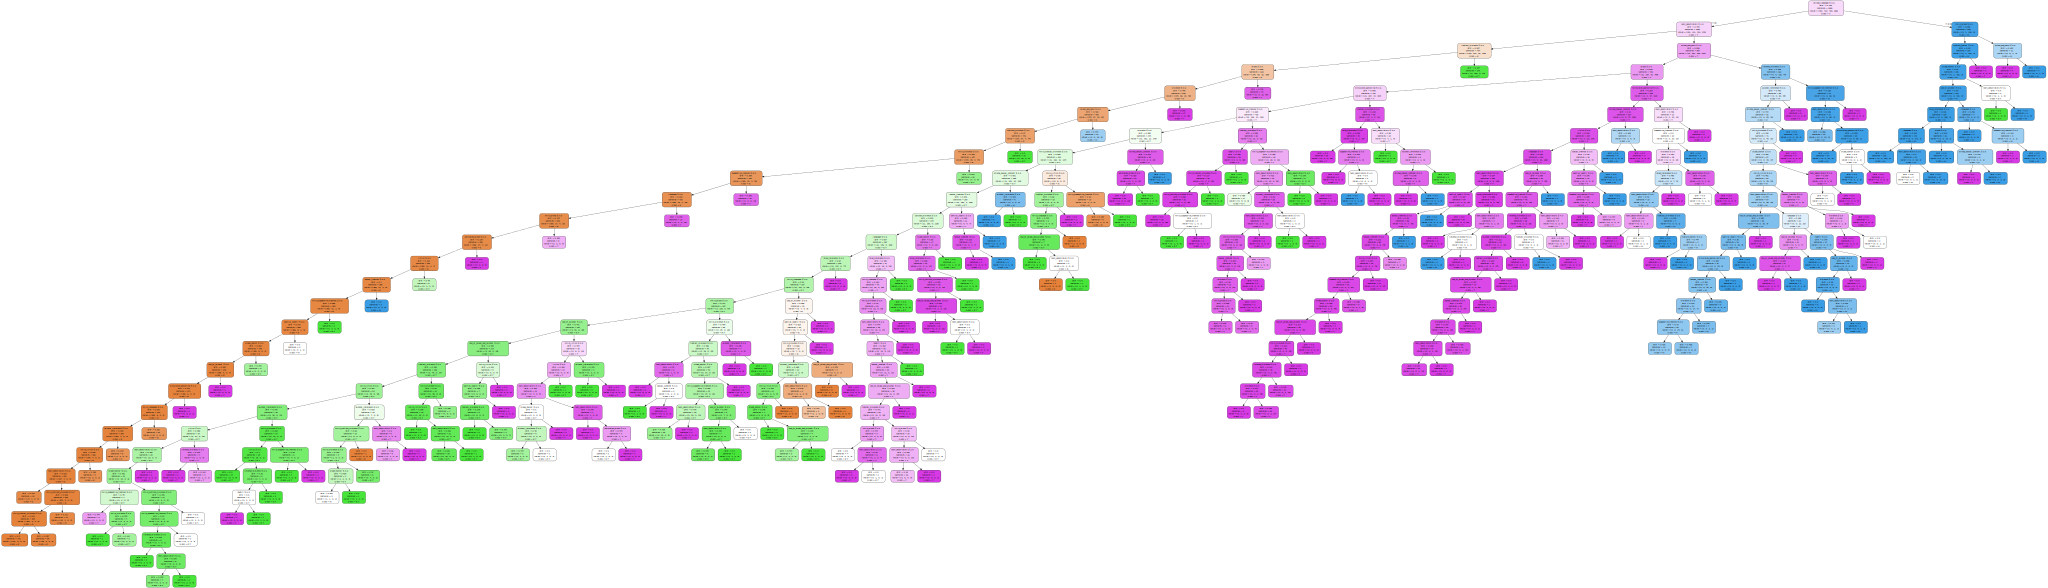

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

Strong Language is the first split

Could try tuning the parameters

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.153878,num_descriptors
29,0.149309,strong_language
7,0.142513,fantasy_violence
3,0.098113,blood_and_gore
2,0.087971,blood
28,0.058360,violence
25,0.030058,suggestive_themes
4,0.025423,cartoon_violence
18,0.025120,mild_violence
9,0.020545,language


Now I will do some hyper paramtere tuning

In [ ]:
# params = { 
#     "criterion": ["gini", "entropy"],
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [32, 35, 38],
#     "max_depth": [ 52, 55, 58, None],
#     #"min_samples_leaf" : [1, 5, 100], # removed this as 1 which is the default always seems to be the nest
#     "splitter" : ["best", "random"]
#     }

In [ ]:
# grid_search_cv =  GridSearchCV( estimator=DecisionTreeClassifier(), 
#     param_grid=params,
#     scoring= "f1_weighted" )

# # need to change the average as multclass is not supported

# # to change the average we need to use none, micro, macro or weighted

In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)
    
# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.plot_confusion_matrix(estimator=model, 
#                               X=X_test, 
#                               y_true=y_test, 
#                               ax=ax,
#                               cmap="Blues")

# # plot_confusion_matrix will be deprecated so should change the plotting method used

I think the order of the classes should reflect the progression of the ratings

M should be the last class

In [ ]:
# dot_data = tree.export_graphviz(model, out_file=None, 
#                      feature_names=selected_features,
#                      class_names=["E", "ET", "M", "T"],
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  

# graph

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Hyper Paramteter tuning did not help the models

They are still only about 80% accurate

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.81      0.80      0.81       104
           M       0.89      0.89      0.89        76
           T       0.85      0.86      0.85       180

    accuracy                           0.87       473
   macro avg       0.88      0.88      0.88       473
weighted avg       0.87      0.87      0.87       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[108   2   0   3]
 [  4  83   0  17]
 [  0   0  68   8]
 [  1  17   8 154]]


              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.81      0.80      0.81       104
           M       0.89      0.89      0.89        76
           T       0.85      0.86      0.85       180

    accuracy                           0.87       473
   macro avg       0.88      0.88      0.88       473
weighted avg       0.87      0.87      0.87       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


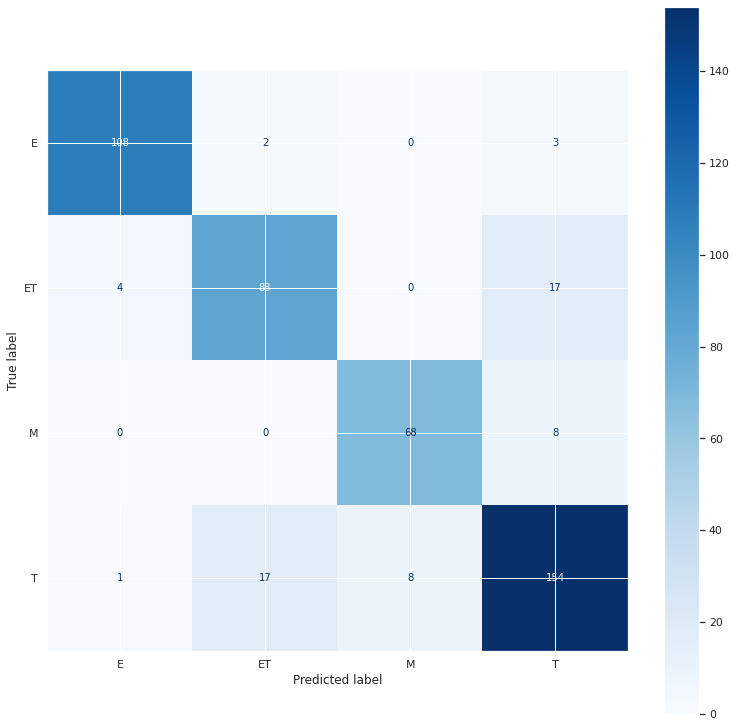

In [ ]:
y_pred = model.predict(X_test)
    
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.137478,num_descriptors
7,0.134078,fantasy_violence
29,0.110801,strong_language
2,0.095101,blood
3,0.083046,blood_and_gore
28,0.058451,violence
25,0.032463,suggestive_themes
24,0.029649,strong_sexual_content
9,0.029632,language
18,0.024757,mild_violence


Not much improvement from the regualr decision tree

Maybe would be better with tuning

In [ ]:
# params = {
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [40, 38, 42],
#     "max_depth":  [ 58, 60, 62 , None],
#     #"min_samples_leaf" : [1, 10, 100],
#     "n_estimators" : [80, 100, 120 ],
#     "criterion" : ["gini", "entropy"]
# }

In [ ]:
# grid_search_cv = GridSearchCV( estimator=RandomForestClassifier(), 
#     param_grid=params,
#     scoring="f1_weighted" )


In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)
    
# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.plot_confusion_matrix(estimator=model, 
#                               X=X_test, 
#                               y_true=y_test, 
#                               ax=ax,
#                               cmap="Blues")

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Final model Selected is the default Random Forest Tree

In [ ]:
model = RandomForestClassifier()

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

Training the data on the whole dataset and passing in the test set just to check the accuracy

This should be fine as even though the model has seen all the data games with the exact same descriptors can get different ratings 

In [ ]:
model.fit(X, y)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.87      0.87      0.87       104
           M       0.93      0.93      0.93        76
           T       0.90      0.90      0.90       180

    accuracy                           0.91       473
   macro avg       0.92      0.92      0.92       473
weighted avg       0.91      0.91      0.91       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[109   1   0   3]
 [  4  90   0  10]
 [  0   0  71   5]
 [  0  13   5 162]]


              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.87      0.87      0.87       104
           M       0.93      0.93      0.93        76
           T       0.90      0.90      0.90       180

    accuracy                           0.91       473
   macro avg       0.92      0.92      0.92       473
weighted avg       0.91      0.91      0.91       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


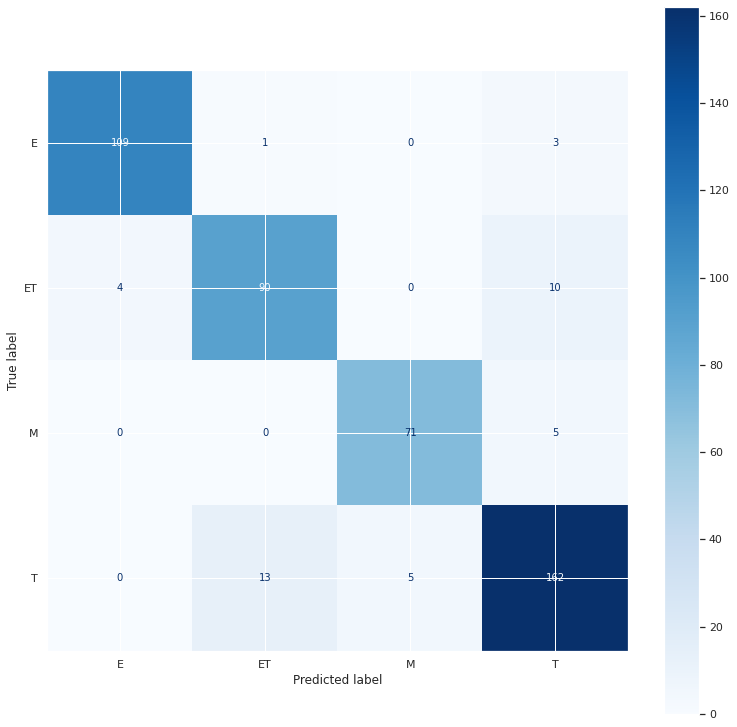

In [ ]:
y_pred = model.predict(X_test)
    
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
7,0.140979,fantasy_violence
30,0.138463,num_descriptors
29,0.116107,strong_language
2,0.097327,blood
3,0.080337,blood_and_gore
28,0.060016,violence
25,0.029698,suggestive_themes
9,0.028013,language
24,0.026372,strong_sexual_content
14,0.025668,mild_fantasy_violence


Training with all the data increased the accuracy to 91%

Maybe remove the console question

In [ ]:
high_impact_descriptors = ["strong_language", "fantasy_violence", "blood_and_gore", "blood", "mild_fantasy_violence"]

In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

In [ ]:
count = 0

new_game_values = []

for descriptor in selected_features:

  

  if (descriptor == "num_descriptors"):
    print()

  else:


    print("Does your game have", descriptor, "?")
    answer = input("Enter y for yes and anything else for no:     ")

    print("**********************************************************************")

    if(answer == "y"):
      new_game_values.append(1)

      count = count + 1

    else:
      new_game_values.append(0)




    
new_game_values.append(count)

# this works as it is the last feature

Does your game have alcohol_reference ?
Enter y for yes and anything else for no:     y
**********************************************************************
Does your game have animated_blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood_and_gore ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have cartoon_violence ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have crude_humor ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have drug_reference ?
Enter y for yes and anything else 

In [ ]:
new_game_values

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

Can look at the correlations to see what impact the high importance features have.

I am not sure how to handle multiple categories that seem to cover similar topics

For example

Blood

and

Blood and Gore

Should they both be answered or does one supercede the other




In [ ]:
new_game_df = pd.DataFrame([new_game_values], columns=selected_features)

In [ ]:
new_game_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,strong_language,num_descriptors
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_pred = model.predict(new_game_df)

In [ ]:
y_pred

array(['E'], dtype=object)

In [ ]:
y_pred_proba = model.predict_proba(new_game_df)

In [ ]:
y_pred_proba

array([[0.92076789, 0.        , 0.        , 0.07923211]])

In [ ]:
df.esrb_rating.value_counts(normalize=True)

T     0.366638
ET    0.218459
E     0.213378
M     0.201524
Name: esrb_rating, dtype: float64

E, ET, M T

There seems to be a bias towars rating games T 

Probably because of the unbalanced nature of the dataset

              precision    recall  f1-score   support

           E       0.97      0.98      0.97       504
          ET       0.87      0.90      0.88       516
           M       0.94      0.93      0.94       476
           T       0.91      0.89      0.90       866

    accuracy                           0.92      2362
   macro avg       0.92      0.92      0.92      2362
weighted avg       0.92      0.92      0.92      2362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


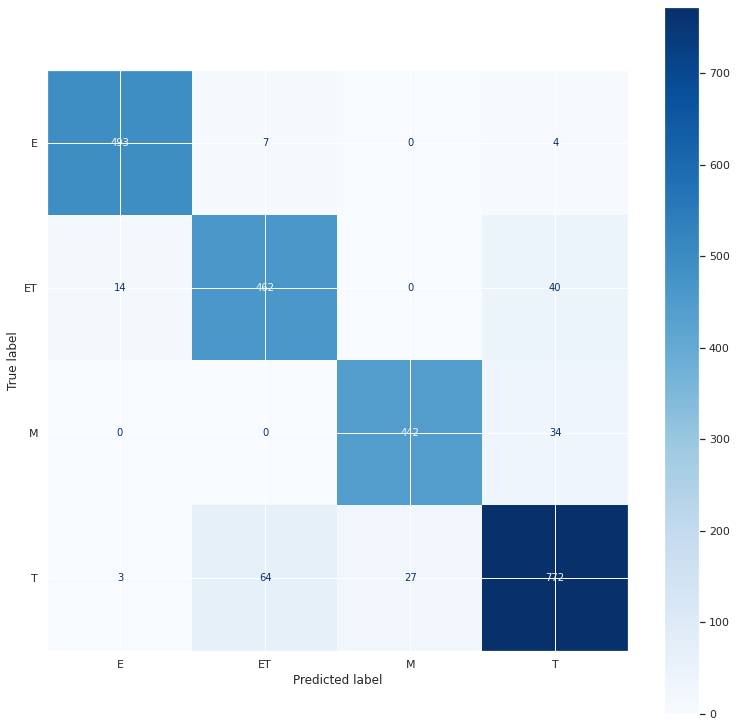

In [ ]:
y_pred = model.predict(X)
    
print(metrics.classification_report(y, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X, 
                              y_true=y, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           E       0.88      0.32      0.47       113
          ET       0.76      0.81      0.78       104
           M       0.85      0.82      0.83        76
           T       0.59      0.82      0.69       180

    accuracy                           0.70       473
   macro avg       0.77      0.69      0.69       473
weighted avg       0.74      0.70      0.68       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


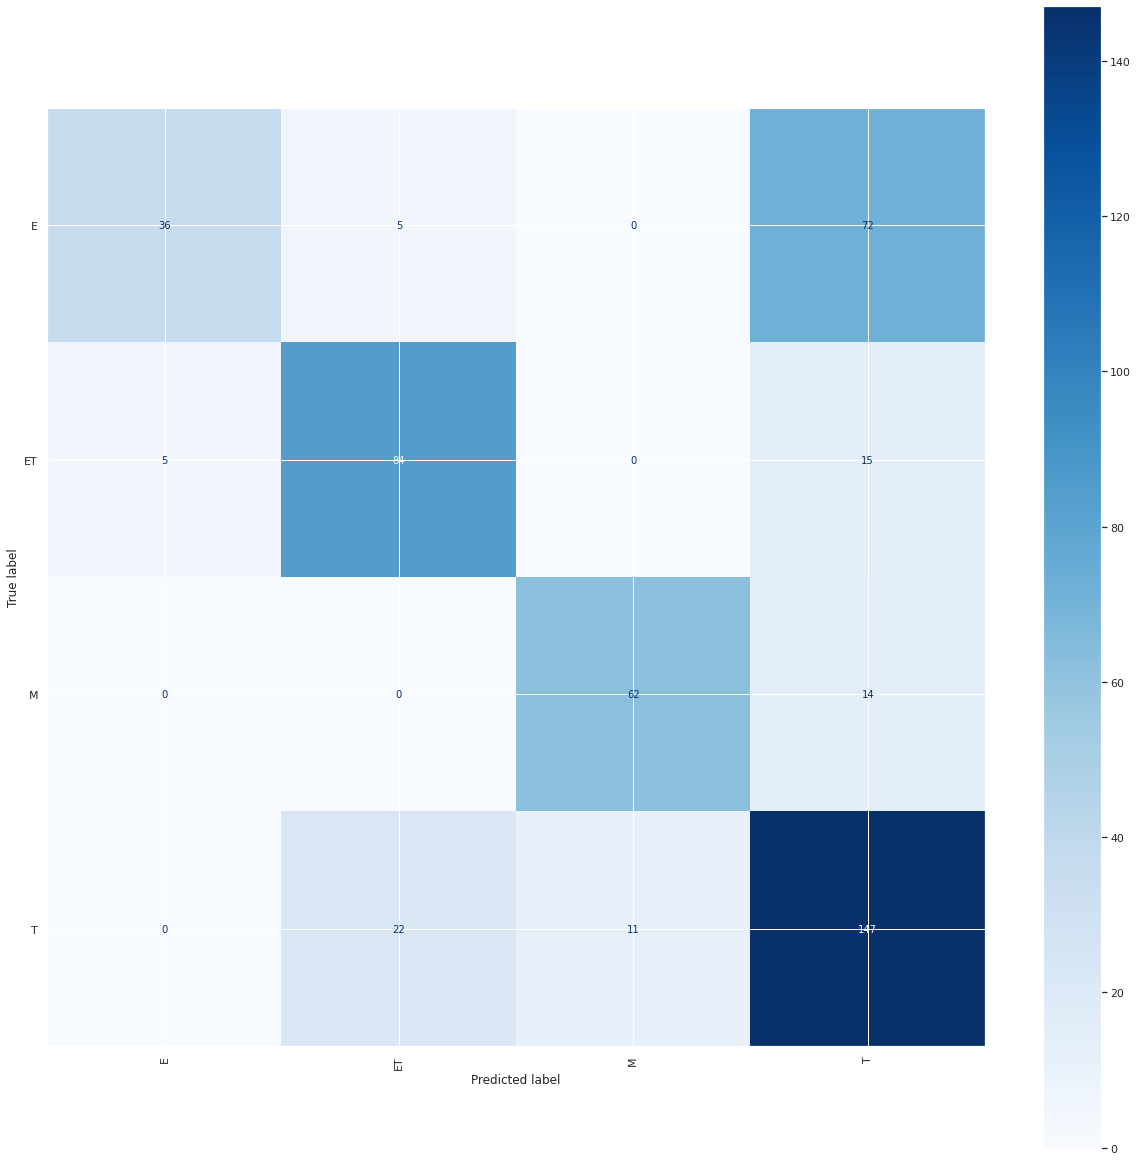

In [ ]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X, y)


# Make new predictions of our testing data. 
y_pred = model.predict(X)

              precision    recall  f1-score   support

           E       0.84      0.34      0.48       504
          ET       0.76      0.83      0.79       516
           M       0.89      0.86      0.87       476
           T       0.60      0.78      0.68       866

    accuracy                           0.71      2362
   macro avg       0.77      0.70      0.71      2362
weighted avg       0.74      0.71      0.70      2362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


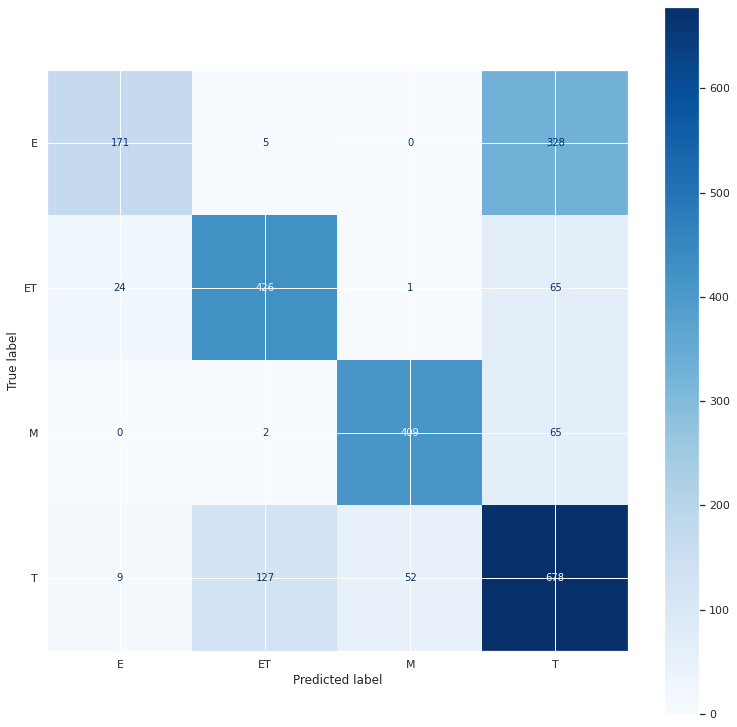

In [ ]:
y_pred = model.predict(X)
    
print(metrics.classification_report(y, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X, 
                              y_true=y, 
                              ax=ax,
                              cmap="Blues")

Random Forest is still the best

In [ ]:
test_df_2 = df[df["num_descriptors"] == 0]

In [ ]:
test_df_2[df["esrb_rating"] == "ET"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,0,0,1
